<a href="https://colab.research.google.com/github/JoshuneArriaga/Apendizaje_Automatico/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
URL: https://www.kaggle.com/datasets/mubeenshehzadi/infant-wellness-and-risk-evaluation-dataset

In [ ]:
import pandas as pd
from scipy.stats import shapiro, skew, kurtosis
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv("/content/newborn_health_monitoring_with_risk.csv")
df

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,96,Formula,8,7,4,4.0,NaN,No,Yes,Healthy
2996,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,98,Breastfeeding,7,6,1,2.4,NaN,No,Yes,Healthy
2997,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,98,Breastfeeding,8,4,1,3.6,NaN,No,Yes,Healthy
2998,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,97,Mixed,10,5,2,2.2,NaN,No,No,Healthy


In [ ]:
df['apgar_score'] = df.groupby('baby_id')['apgar_score'].ffill()
df['apgar_score'] = df.groupby('baby_id')['apgar_score'].bfill()


In [ ]:
numericas = [
    'gestational_age_weeks',
    'birth_weight_kg',
    'birth_length_cm',
    'birth_head_circumference_cm',
    'age_days',
    'weight_kg',
    'length_cm',
    'head_circumference_cm',
    'temperature_c',
    'heart_rate_bpm',
    'respiratory_rate_bpm',
    'oxygen_saturation',
    'feeding_frequency_per_day',
    'urine_output_count',
    'stool_count',
    'jaundice_level_mg_dl',
    'apgar_score'
]
x = df[numericas].copy()
x


,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score
0,40.2,3.30,50.0,31.9,1,3.28,50.1,32.0,37.0,160,36,98,11,9,0,4.2,7.0
1,40.2,3.30,50.0,31.9,2,3.35,50.2,32.0,37.2,156,40,99,11,5,2,10.6,7.0
2,40.2,3.30,50.0,31.9,3,3.35,50.6,32.1,37.1,137,37,97,7,6,5,9.8,7.0
3,40.2,3.30,50.0,31.9,4,3.48,50.3,32.0,37.4,130,33,97,11,8,4,8.1,7.0
4,40.2,3.30,50.0,31.9,5,3.50,50.3,31.8,36.8,138,39,96,11,7,1,11.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,39.1,4.47,50.8,36.3,26,5.29,52.4,36.9,36.7,125,44,96,8,7,4,4.0,10.0
2996,39.1,4.47,50.8,36.3,27,5.23,52.1,36.8,37.0,138,31,98,7,6,1,2.4,10.0
2997,39.1,4.47,50.8,36.3,28,5.29,52.3,36.7,36.8,143,42,98,8,4,1,3.6,10.0
2998,39.1,4.47,50.8,36.3,29,5.39,52.4,37.0,37.4,119,52,97,10,5,2,2.2,10.0


In [ ]:
scaler = StandardScaler()
x_escalada = scaler.fit_transform(x)
x_escalada

array([[ 0.84213798,  0.16920128,  0.12729007, ..., -1.44119448,
         0.01276723, -1.2094158 ],
       [ 0.84213798,  0.16920128,  0.12729007, ..., -0.26390832,
         2.24936147, -1.2094158 ],
       [ 0.84213798,  0.16920128,  0.12729007, ...,  1.50202094,
         1.96978719, -1.2094158 ],
       ...,
       [ 0.14141803,  2.25304857,  0.50030128, ..., -0.8525514 ,
        -0.19691349,  1.38218948],
       [ 0.14141803,  2.25304857,  0.50030128, ..., -0.26390832,
        -0.68616848,  1.38218948],
       [ 0.14141803,  2.25304857,  0.50030128, ..., -0.8525514 ,
        -0.4065942 ,  1.38218948]])

#**1) Algoritmo DBScan**

Distancia definida (DBSCAN): utiliza una distancia especificada para separar los clústeres densos del ruido más disperso. El algoritmo DBSCAN es el método de clustering más rápido, pero solo es apropiado si se puede utilizar una distancia de búsqueda muy clara, y funciona bien con todos los clústeres potenciales. Para ello, se requiere que todos los clústeres significativos presenten densidades similares. Este método también permite utilizar los parámetros Campo de tiempo e Intervalo de tiempo de búsqueda para buscar clústeres de puntos en espacio y tiempo.

Si el valor del parámetro Entidades mínimas por clúster se encuentra dentro de la distancia de búsqueda a partir de un punto en particular, ese punto se marcará como punto de núcleo y se incluirá en un clúster, junto con todos los puntos dentro de la distancia de núcleo. Un punto de borde es un punto que se encuentra dentro de la distancia de búsqueda de un punto de núcleo, pero no tiene el número mínimo de entidades dentro de la distancia de búsqueda.



**Parameters Recap:**
* ε (epsilon): El radio máximo de una vecindad alrededor de un punto (es decir, cuán cerca deben estar los puntos entre sí para ser considerados vecinos).  
* min_samples: El número mínimo de puntos necesarios para formar una región densa (incluido el punto mismo).



#**2) Estrategias para determinar número de grupos en estos algoritmos**



*   Silhouette Score
*   Davies-Bouldin
*   Calinski Harabasz Score



In [ ]:
pca = PCA()
pca.fit(x_escalada)

#Varianza explicada
var_explained = pca.explained_variance_ratio_
cumsum_var = np.cumsum(var_explained)

print(f"\nVarianza explicada por componente:")
for i in range(min(10, len(var_explained))):
    print(f"  PC{i+1}: {var_explained[i]*100:.2f}% (acumulado: {cumsum_var[i]*100:.2f}%)")

n_components_90 = np.argmax(cumsum_var >= 0.90) + 1
print(f"\n {n_components_90} componentes explican el 90% de la varianza")



Varianza explicada por componente:
  PC1: 13.05% (acumulado: 13.05%)
  PC2: 12.68% (acumulado: 25.73%)
  PC3: 10.92% (acumulado: 36.65%)
  PC4: 8.33% (acumulado: 44.98%)
  PC5: 6.43% (acumulado: 51.41%)
  PC6: 6.17% (acumulado: 57.59%)
  PC7: 6.10% (acumulado: 63.69%)
  PC8: 5.91% (acumulado: 69.60%)
  PC9: 5.86% (acumulado: 75.46%)
  PC10: 5.72% (acumulado: 81.19%)

 12 componentes explican el 90% de la varianza


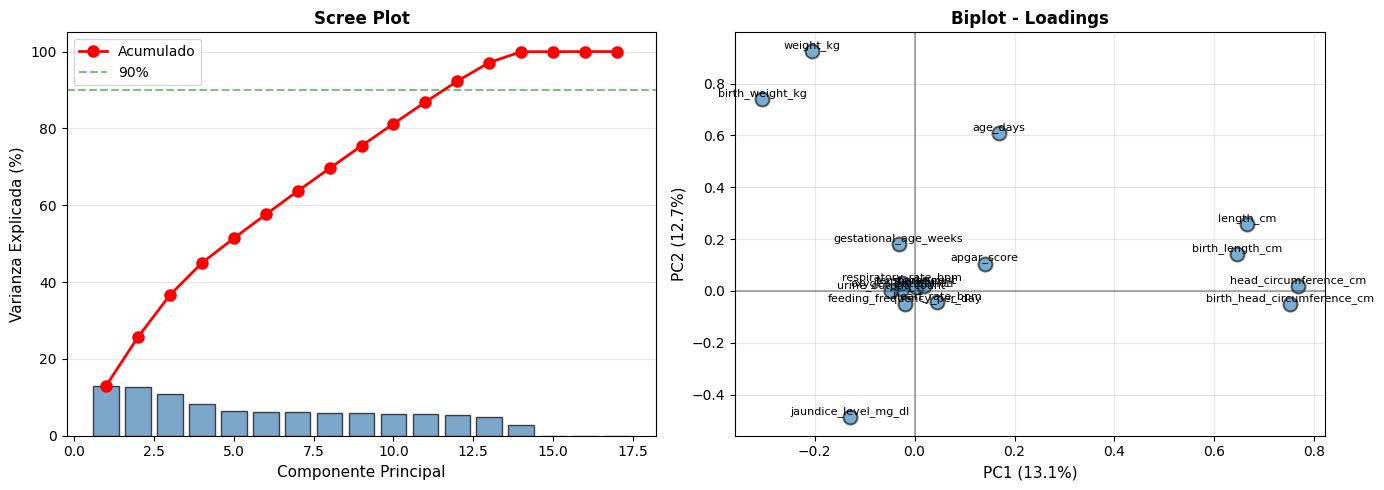

In [ ]:
# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(var_explained)+1), var_explained * 100,
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].plot(range(1, len(var_explained)+1), cumsum_var * 100,
             'ro-', linewidth=2, markersize=8, label='Acumulado')
axes[0].axhline(y=90, color='g', linestyle='--', alpha=0.5, label='90%')
axes[0].set_xlabel('Componente Principal', fontsize=11)
axes[0].set_ylabel('Varianza Explicada (%)', fontsize=11)
axes[0].set_title('Scree Plot', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

#Loadings (contribución de variables a PC1 y PC2)
loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
axes[1].scatter(loadings[:, 0], loadings[:, 1], s=100, alpha=0.6,
                edgecolors='black', linewidth=1.5)

for i, var in enumerate(numericas):
    axes[1].annotate(var, (loadings[i, 0], loadings[i, 1]),
                     fontsize=8, ha='center', va='bottom')

axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_xlabel(f'PC1 ({var_explained[0]*100:.1f}%)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({var_explained[1]*100:.1f}%)', fontsize=11)
axes[1].set_title('Biplot - Loadings', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()




In [ ]:
loadings_df = pd.DataFrame(
    pca.components_[:5].T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=numericas
)

loadings_df['Importancia_Total'] = loadings_df.abs().sum(axis=1)
loadings_df = loadings_df.sort_values('Importancia_Total', ascending=False)

print(loadings_df[['PC1', 'PC2', 'PC3', 'Importancia_Total']].to_string())

                                  PC1       PC2       PC3  Importancia_Total
birth_weight_kg             -0.204817  0.503854 -0.097997           1.432031
birth_length_cm              0.432596  0.096759  0.511442           1.282477
length_cm                    0.446777  0.175985  0.501300           1.272048
birth_head_circumference_cm  0.504497 -0.033396 -0.455800           1.227548
weight_kg                   -0.137562  0.631287 -0.090942           1.178137
jaundice_level_mg_dl        -0.086167 -0.332096  0.020212           1.160790
head_circumference_cm        0.515106  0.014122 -0.451349           1.145961
age_days                     0.113641  0.415044 -0.002833           1.126690
apgar_score                  0.094305  0.070764 -0.183080           1.083803
gestational_age_weeks       -0.021466  0.124580 -0.144429           1.038405
urine_output_count          -0.031524 -0.000947 -0.002066           0.513194
heart_rate_bpm               0.030258 -0.030128 -0.000432           0.367888

In [ ]:
#quedarse con las primeras 12 mas importantes
numericas = [
    'gestational_age_weeks',
    'birth_weight_kg',
    'birth_length_cm',
    'birth_head_circumference_cm',
    'age_days',
    'weight_kg',
    'length_cm',
    'head_circumference_cm',
    #'temperature_c',
    'heart_rate_bpm',
    #'respiratory_rate_bpm',
    #'oxygen_saturation',
    #'feeding_frequency_per_day',
    'urine_output_count',
    #'stool_count',
    'jaundice_level_mg_dl',
    'apgar_score'
]
x = df[numericas].copy()
x_escalada = scaler.fit_transform(x)
x_escalada

array([[ 0.84213798,  0.16920128,  0.12729007, ...,  1.48778062,
         0.01276723, -1.2094158 ],
       [ 0.84213798,  0.16920128,  0.12729007, ..., -0.8644417 ,
         2.24936147, -1.2094158 ],
       [ 0.84213798,  0.16920128,  0.12729007, ..., -0.27638612,
         1.96978719, -1.2094158 ],
       ...,
       [ 0.14141803,  2.25304857,  0.50030128, ..., -1.45249729,
        -0.19691349,  1.38218948],
       [ 0.14141803,  2.25304857,  0.50030128, ..., -0.8644417 ,
        -0.68616848,  1.38218948],
       [ 0.14141803,  2.25304857,  0.50030128, ...,  0.31166946,
        -0.4065942 ,  1.38218948]])

In [ ]:
min_samples = 10

In [ ]:
#Calcular distancias a los k-vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x_escalada)
distances, indices = neighbors_fit.kneighbors(x_escalada)

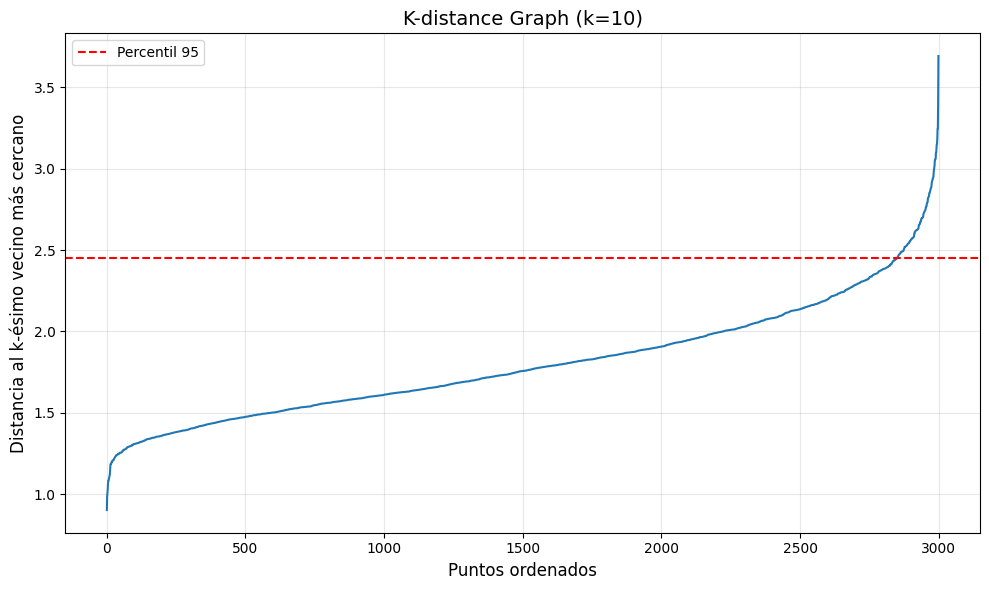

In [ ]:
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.ylabel('Distancia al k-ésimo vecino más cercano', fontsize=12)
plt.xlabel('Puntos ordenados', fontsize=12)
plt.title(f'K-distance Graph (k={min_samples})', fontsize=14)
plt.axhline(y=np.percentile(distances, 95), color='r', linestyle='--',
            label='Percentil 95')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
epsilon_suggested = np.percentile(distances, 95) #en base al codo al percentil 95%
epsilon_suggested

np.float64(2.4490536110419834)

In [ ]:
epsilon_values = [epsilon_suggested * 0.8, epsilon_suggested, epsilon_suggested * 1.2]
results = []

for eps in epsilon_values:

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = dbscan.fit_predict(x_escalada)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        mask = labels != -1
        x_sin_ruido = x_escalada[mask]
        labels_no_noise = labels[mask]

        silhouette = silhouette_score(x_sin_ruido, labels_no_noise)
        davies = davies_bouldin_score(x_sin_ruido, labels_no_noise)
        calinski = calinski_harabasz_score(x_sin_ruido, labels_no_noise)
    else:
        silhouette = davies = calinski = np.nan

    results.append({
        'epsilon': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_pct': (n_noise / len(labels)) * 100,
        'silhouette': silhouette,
        'davies_bouldin': davies,
        'calinski_harabasz': calinski
    })

    print(f"\nε = {eps:.4f}:")
    print(f"  Clusters encontrados: {n_clusters}")
    print(f"  Puntos de ruido: {n_noise} ({(n_noise/len(labels))*100:.2f}%)")
    if not np.isnan(silhouette):
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index: {davies:.4f}")
        print(f"  Calinski-Harabasz Index: {calinski:.2f}")




ε = 1.9592:
  Clusters encontrados: 9
  Puntos de ruido: 225 (7.50%)
  Silhouette Score: -0.0458
  Davies-Bouldin Index: 1.1984
  Calinski-Harabasz Index: 37.86

ε = 2.4491:
  Clusters encontrados: 2
  Puntos de ruido: 16 (0.53%)
  Silhouette Score: 0.1860
  Davies-Bouldin Index: 1.1460
  Calinski-Harabasz Index: 46.36

ε = 2.9389:
  Clusters encontrados: 1
  Puntos de ruido: 0 (0.00%)


In [ ]:
results_df = pd.DataFrame(results)
results_df

,epsilon,n_clusters,n_noise,noise_pct,silhouette,davies_bouldin,calinski_harabasz
0,1.959243,9,225,7.500000,-0.045798,1.198447,37.864188
1,2.449054,2,16,0.533333,0.186034,1.145973,46.358120
2,2.938864,1,0,0.000000,NaN,NaN,NaN


In [ ]:

best_idx = results_df['silhouette'].idxmax()
best_eps = results_df.loc[best_idx, 'epsilon']

print(f"\n Mejor resultado: ε = {best_eps:.4f}")


 Mejor resultado: ε = 2.4491


In [ ]:
dbscan_final = DBSCAN(eps=best_eps, min_samples=min_samples, n_jobs=-1)
final_labels = dbscan_final.fit_predict(x_escalada)

#Agregar etiquetas al dataframe original
df['cluster'] = final_labels
df

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,cluster
0,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk,0
1,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,Formula,11,5,2,10.6,7.0,No,No,At Risk,0
2,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,Breastfeeding,7,6,5,9.8,7.0,No,No,Healthy,0
3,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,Mixed,11,8,4,8.1,7.0,No,Yes,Healthy,0
4,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,Breastfeeding,11,7,1,11.6,7.0,No,Yes,At Risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,Formula,8,7,4,4.0,10.0,No,Yes,Healthy,0
2996,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,Breastfeeding,7,6,1,2.4,10.0,No,Yes,Healthy,0
2997,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,Breastfeeding,8,4,1,3.6,10.0,No,Yes,Healthy,0
2998,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,Mixed,10,5,2,2.2,10.0,No,No,Healthy,0


In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_escalada)
explained_var = pca.explained_variance_ratio_

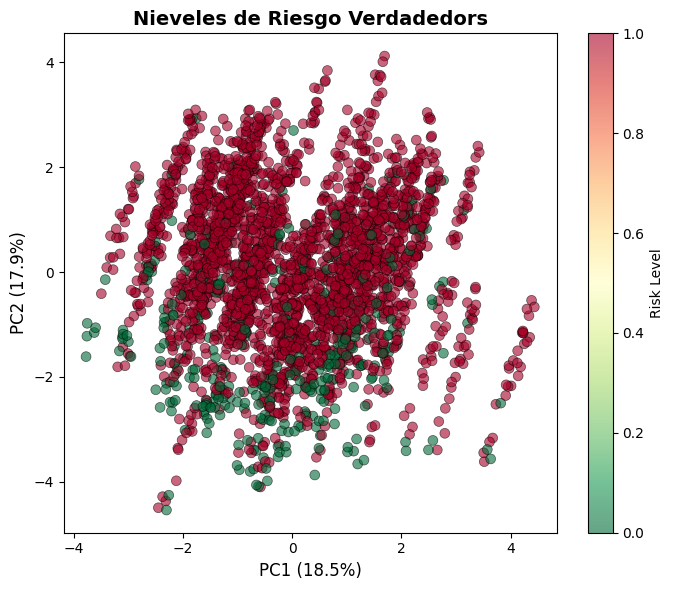

In [ ]:
le = LabelEncoder()
risk_encoded = le.fit_transform(df['risk_level'].fillna('unknown'))
fig, ax = plt.subplots(figsize=(7, 6))

scatter = ax.scatter(
    x_pca[:, 0],
    x_pca[:, 1],
    c=risk_encoded,
    cmap='RdYlGn_r',
    s=50,
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)
ax.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}%)', fontsize=12)
ax.set_title('Nieveles de Riesgo Verdadedors', fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Risk Level')

plt.tight_layout()
plt.show()